In [ ]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
df = pd.read_csv("Telco-Customer-Churn-1.csv")

In [4]:
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2643,3550-SAHFP,Female,0,No,No,33,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,83.35,2757.85,Yes
6832,9173-IVZVP,Female,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.90,1146.05,No
6198,0071-NDAFP,Male,0,Yes,Yes,25,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),25.50,630.6,No
1720,6407-UTSLV,Female,1,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),83.80,163.7,No
3614,8039-EQPIM,Male,0,Yes,No,69,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),60.25,4055.5,No


In [5]:
df.drop(columns=['customerID'], inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [7]:
df.duplicated().sum()

22

In [8]:
df = df.drop_duplicates(keep='first')

In [9]:
print(df.isnull().sum())

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [10]:
# df["TotalCharges"] = df["TotalCharges"].astype(float)

In [11]:
len(df[df["TotalCharges"]==" "])

11

In [12]:
df['TotalCharges'] = df['TotalCharges'].str.strip()
df['TotalCharges'] = df['TotalCharges'].replace("" , np.nan) # because empty  string cannot be cast to float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   object 
 1   SeniorCitizen     7021 non-null   int64  
 2   Partner           7021 non-null   object 
 3   Dependents        7021 non-null   object 
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   object 
 6   MultipleLines     7021 non-null   object 
 7   InternetService   7021 non-null   object 
 8   OnlineSecurity    7021 non-null   object 
 9   OnlineBackup      7021 non-null   object 
 10  DeviceProtection  7021 non-null   object 
 11  TechSupport       7021 non-null   object 
 12  StreamingTV       7021 non-null   object 
 13  StreamingMovies   7021 non-null   object 
 14  Contract          7021 non-null   object 
 15  PaperlessBilling  7021 non-null   object 
 16  PaymentMethod     7021 non-null   object 
 17  

In [14]:
df[df["TotalCharges"].isna()][["tenure", "MonthlyCharges", "TotalCharges", "Churn"]]

,tenure,MonthlyCharges,TotalCharges,Churn
488,0,52.55,NaN,No
753,0,20.25,NaN,No
936,0,80.85,NaN,No
1082,0,25.75,NaN,No
1340,0,56.05,NaN,No
3331,0,19.85,NaN,No
3826,0,25.35,NaN,No
4380,0,20.00,NaN,No
5218,0,19.70,NaN,No
6670,0,73.35,NaN,No


Insight->

So these customers whose total_charges are NAN are new customers , so it will logically correct 
to fill their totalcharges with 0 .

In [15]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)
df["TotalCharges"].isna().sum()

0

Feature Selection


In [16]:
# Feature that are important for clustering

features = ["tenure" , "MonthlyCharges","TotalCharges"] 

In [19]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 6):   # 2,3,4,5
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)

    score = silhouette_score(X_scaled, labels)
    print("K =", k, "| Silhouette =", round(score, 4))


K = 2 | Silhouette = 0.4793
K = 3 | Silhouette = 0.4513
K = 4 | Silhouette = 0.4716
K = 5 | Silhouette = 0.4434


In [ ]:
## choosing k = 4 to make 4 different clusters of customers

In [22]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df["cluster"] = kmeans.fit_predict(X_scaled)

print(df["cluster"].value_counts())


cluster
2    2270
1    1904
0    1688
3    1159
Name: count, dtype: int64


In [25]:
features = ["tenure", "MonthlyCharges", "TotalCharges"]

cluster_summary = df.groupby("cluster")[features].mean()
print(cluster_summary)


            tenure  MonthlyCharges  TotalCharges
cluster                                         
0        10.316351       31.849200    305.040729
1        59.530987       93.306224   5548.653887
2        15.462996       80.808899   1254.287996
3        53.585850       34.920147   1836.581320


### Insight ->

1. Cluster 1 - High Value  --> 
(tenure highest + monthly highest + total highest )

2. Cluster 3 - Medium Value -->
(tenure high but monthly low → loyal but low revenue)

3. Cluster 2 - Low Value -->
(monthly high but tenure low → still low overall value)

4. Cluster 0 - Very Low Value --> 
(tenure low + monthly low + total lowest)

In [ ]:
cster_map = {
    0: "Very Low Value",
    2: "Low Value",
    3: "Medium Value",
    1: "High Value"
}
lu

In [27]:
df["value_segment"] = df["cluster"].map(cluster_map)
df["value_segment"].value_counts()


value_segment
Low Value         2270
High Value        1904
Very Low Value    1688
Medium Value      1159
Name: count, dtype: int64

* Plotting a 3d SCatter plot for better to visualize the separation of KMeans clusters using tenure, monthly charges and total charges.

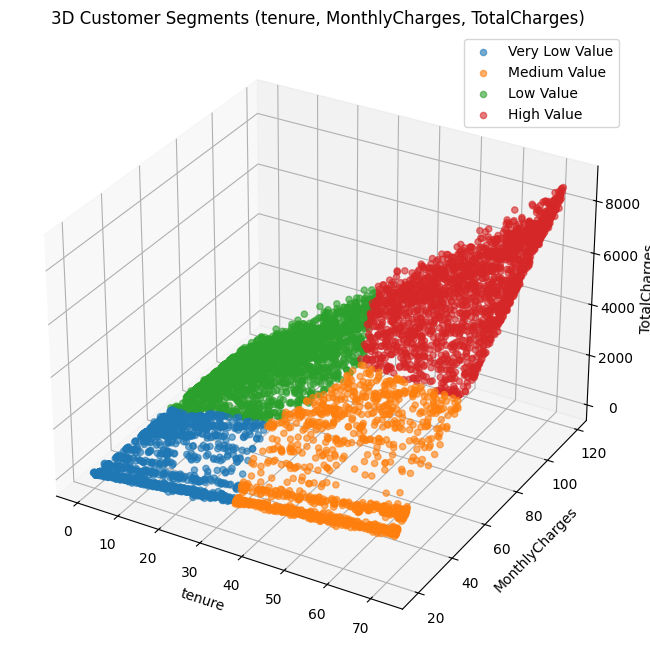

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection="3d")

for seg in df["value_segment"].unique():
    temp = df[df["value_segment"] == seg]
    ax.scatter(
        temp["tenure"],
        temp["MonthlyCharges"],
        temp["TotalCharges"],
        label=seg,
        alpha=0.6
    )

ax.set_xlabel("tenure")
ax.set_ylabel("MonthlyCharges")
ax.set_zlabel("TotalCharges")
ax.set_title("3D Customer Segments (tenure, MonthlyCharges, TotalCharges)")
ax.legend()

plt.show()


* Saving the Model 

In [38]:
from sklearn.pipeline import Pipeline
import joblib

# Features used for clustering
features = ["tenure", "MonthlyCharges", "TotalCharges"]
X = df[features]

# Create pipeline
kmeans_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("kmeans", KMeans(n_clusters=4, random_state=42, n_init=10))
])

# Train model
kmeans_pipe.fit(X)





,steps,"[('scaler', ...), ('kmeans', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_clusters,4
,init,'k-means++'
,n_init,10
,max_iter,300


In [37]:
joblib.dump(cluster_map, "cluster_map.pkl")
print("cluster_map saved as cluster_map.pkl")

joblib.dump(kmeans_pipe, "customer_segmentation_kmeans_pipeline.pkl")
print("Pipeline saved!")


cluster_map saved as cluster_map.pkl
Pipeline saved!
